In [9]:
import os
import xlrd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import datetime as dt
import copy
import matplotlib.dates as mdate
import scipy.optimize as spo

In [10]:
#极值处理
def medianpeak(x):
    y=np.copy(x)
    ymedian=np.median(y)
    zmid=np.median(np.abs(y-np.median(y)))
    y[y<=ymedian-5.2*zmid]=(ymedian-5.2*zmid)
    y[y>=ymedian+5.2*zmid]=(ymedian+5.2*zmid)
    return 1/y
#无量纲化
def nondimensionalize(x):
    y=np.copy(x)
    ymean=np.mean(y)
    ystd=np.std(y)
    y=(y-ymean)/ystd
    return y
# 时间调整
def dadjust(data):
    data0=copy.deepcopy(data)
    index1=data0.index.to_period(freq=frequency).values
    fre=np.unique(index1)
    data0.index=index1
    data0.index=data0.index.to_series().astype(str).values
    return data0
#移动平均：
def rollmean(x,n):
    y=np.zeros(len(x)-n+1)
    for i in range(len(x)-n+1):
        y[i]=x[i:i+n].mean()
    return y
#时间频率和分组
frequency=input()
gronum=input()
ula=input()

W
15
12


In [11]:
path=input()

C:\\Users\\wuboyuan\\Desktop\\data\\redata\\


# 每日收益率

In [12]:
ula=int(ula)
errate11=pd.read_csv('C:\\Users\\wuboyuan\\Desktop\\data\\spj.csv',parse_dates=True,index_col=0)
errate1=dadjust(errate11)
indexchina1=pd.read_csv('C:\\Users\\wuboyuan\\Desktop\\data\\000905.csv',parse_dates=True,index_col=0)
indexchina=dadjust(indexchina1)
errate=(errate1-errate1.shift(1))/errate1.shift(1)
errate=errate[1:]
errate500=(indexchina-indexchina.shift(1))/indexchina.shift(1)
errate500=errate500[1:]

# 周期收益率

In [13]:
fre0=np.unique(errate.index)
for i in range(len(fre0)):
    if i ==0:
        cdrate=0
        indec500=0
    else:
        u=len(errate1.loc[fre0[i-1]])
        m=len(errate1.loc[fre0[i]])
        rate0=errate1.loc[fre0[i-1]]
        rate0=rate0[u-1:u]
        rate50=indexchina.loc[fre0[i-1]][u-1:u]
        rate1=errate1.loc[fre0[i]]
        rate1=rate1[m-1:m]
        rate510=indexchina.loc[fre0[i]][m-1:m]
        rate=rate0.append(rate1)
        rate500=rate50.append(rate510)
        rate=(rate-rate.shift(1))/rate.shift(1)
        rate500=(rate500-rate500.shift(1))/rate500.shift(1)
        rate=rate[1:]
        rate500=rate500[1:]
        cdrate0=copy.deepcopy(rate)
        rate501=copy.deepcopy(rate500)
        if i==1:
            cdrate=cdrate0
            cdrate500=rate501
        else:
            cdrate=cdrate.append(cdrate0)
            cdrate500=cdrate500.append(rate501)

# 读取数据分组

In [14]:
file={}
data={}
key=[]
data0={}
fre={}
name=os.listdir(path)
for i in range(len(name)):
    file[i]=os.path.join(path,name[i])
    data[name[i][0:-4]]=pd.read_csv(file[i],parse_dates=True,index_col=0)
    key.append(name[i][0:-4])
    data0[key[i]]=dadjust(data[key[i]])
    fre[key[i]]=np.unique(data0[key[i]].index)

In [15]:
dic={}
group={}
data1={}
sdata={}
for j in range(len(name)):
    dic[key[j]]={}
    group[key[j]]={}
    mrate=np.zeros(len(fre)-1)
    for i in range(len(fre[key[j]])+1):
        group[key[j]][i]={}
        data1[key[j]]=data0[key[j]].loc[fre[key[j]][i-1]]
        data1[key[j]]=data1[key[j]][data1[key[j]]!=0]
        data1[key[j]]=data1[key[j]][len(data1[key[j]])-1:len(data1[key[j]])].T.dropna()
        sdata[key[j]]=data1[key[j]].apply(medianpeak).apply(nondimensionalize).sort_values(by=fre[key[j]][i-1],ascending=False)
        l=len(sdata[key[j]])
        if i ==0:
            dic[key[j]][i]=0
        else:
            for u in range(int(gronum)):
                group[key[j]][i][u]=sdata[key[j]][round(((u)/int(gronum))*l):round(((u+1)/int(gronum))*l)].index
    dic[key[j]]=copy.deepcopy(group[key[j]])

# 计算单调性和分组收益

In [16]:
dicrate={}
grorate={}
grorate500={}
rollrate={}
for u in range(len(key)):
    mrate=np.zeros(len(fre[key[u]])-1)
    dicrate[key[u]]={}
    grorate[key[u]]={}
    grorate500[key[u]]={}
    rollrate[key[u]]={}
    for j in range(int(gronum)):
        for i in range(len(fre[key[u]])-1):
            mrate[i]=cdrate[dic[key[u]][i+1][j]].loc[fre[key[u]][i+1]].mean()
        dicrate[key[u]][j]= copy.deepcopy(mrate)
    for k in dicrate[key[u]]:
        grorate[key[u]][k]=dicrate[key[u]][k].mean()#可以用移动加权平均值
        grorate500[key[u]][k]=dicrate[key[u]][k].mean()-cdrate500.mean()
        rollrate[key[u]][k]=rollmean(dicrate[key[u]][k],ula)##移动平均收益   ####

# 移动加权IC

In [17]:
groic={}
rollic={}
for u in range(len(key)):
    ic=np.zeros(len(fre[key[u]])-1)
    ic500=np.zeros(len(fre[key[u]])-1)
    icde=np.zeros(len(fre[key[u]])-1)
    for i in range(len(fre[key[u]])-1):
        data2=data0[key[u]].loc[fre[key[u]][i]]
        data2=data2[len(data2)-1:len(data2)]
        icdata=data2[dic[key[u]][i+1][0]].values
        icrate=cdrate[dic[key[u]][i+1][0]].loc[fre[key[u]][i+1]].values
        datarank=np.arange(len(icrate)+1)[1:]
        ic[i]=np.corrcoef(datarank,icrate)[1][0]
    groic[key[u]]=copy.deepcopy(ic)
    rollic[key[u]]=rollmean(groic[key[u]],ula)###移动平均IC  ###

In [18]:
#基于夏普比率最大化
rateco={}
rate_mean={}
weight={}
for i in range(len(rollic[key[0]])):
    for j in range(len(key)):
        ratecov0=copy.deepcopy(dicrate[key[j]][0][i:i+ula]) ####
        rate_c0=copy.deepcopy(rollrate[key[j]][0][i])
        if j==0:
            ratecov=ratecov0
            rate_c=rate_c0
        else:
            ratecov=np.vstack((ratecov,ratecov0))
            rate_c=np.vstack((rate_c,rate_c0))
    rateco[i]=np.cov(ratecov)
    rate_c=rate_c.T[0]
    rate_mean[i]=rate_c

# 组合权重确定

In [21]:
for k in range(len(rate_mean)):
    def weu(u):
        for i in range(len(rate_mean[k])):
            func0=u[i]*rate_mean[k][i]
            if i ==0:
                func=copy.deepcopy(func0)
            else:
                func=func+func0
        for j in range(len(rate_mean[k])):
            for i in range(len(rate_mean[k])):
                f0=u[i]*rateco[k][i][j]
                if i ==0:
                    f=f0
                else:
                    f=f+f0
            t0=f*u[j]
            if j==0:
                t=copy.deepcopy(t0)
            else:
                t=t+t0
        return -(func/(t**0.5))
    #cons=({'type': 'eq', 'fun': lambda u: 1-u[0]-u[1]})
    #bnds=((0.001,10),(0.001,10),(0.001,10))
    point=np.ones(len(rate_mean[k]))
    weight[k]=spo.minimize(weu,point,method='SLSQP',bounds='',constraints='').x
    weight[k]=(weight[k]-weight[k].min())/(weight[k].max()-weight[k].min())
    weight[k]=weight[k]/weight[k].sum()

 # 组合排序分组

In [34]:
n_group={}
n_dic={}
for i in range(len(rate_mean)):
    for k in range(len(key)):
        c_data=data0[key[k]].loc[fre[key[k]][i+ula-1]]###
        c_data=c_data[c_data!=0]
        c_data=c_data[len(c_data)-1:len(c_data)].T.dropna()
        c_data=c_data.apply(medianpeak).apply(nondimensionalize)#.sort_values(by=fre[key[k]][i+ula-1],ascending=False)
        #ranks=np.arange(len(c_data))
        #c_data.T.values[0]=ranks
        c_data=c_data*1#weight[i][k]
        if k==0:
            n_data=copy.deepcopy(c_data)
        else:
            n_data=n_data+c_data
    n_data=n_data.dropna().sort_values(by=fre[key[k]][i+ula-1],ascending=False)####
    n_l=len(n_data)
    for j in range(int(gronum)):
            n_group[j]=n_data[round(((j)/int(gronum))*n_l):round(((j+1)/int(gronum))*n_l)].index
    n_dic[i]=copy.deepcopy(n_group)

# 组合单调性

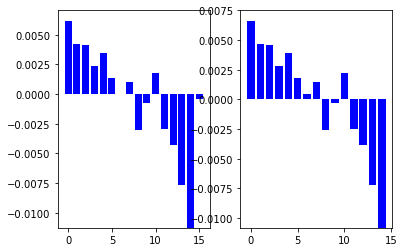

In [35]:
n_mrate=np.zeros(len(rate_mean))
n_dicrate={}
n_grorate=np.zeros(int(gronum))
n_grorate500=np.zeros(int(gronum))
for j in range(int(gronum)):
    for i in range(len(rate_mean)):
        n_mrate[i]=cdrate[n_dic[i][j]].loc[fre0[i+ula]].mean()###
    n_dicrate[j]= copy.deepcopy(n_mrate)
for k in n_dicrate:
    n_grorate[k]=n_dicrate[k].mean()
    n_grorate500[k]=n_dicrate[k].mean()-cdrate500.mean()
n_grorate0=np.hstack((n_grorate,cdrate500.mean().values[0]))
num=np.arange(len(n_grorate0))
num1=np.arange(len(n_grorate500))
plt.subplot(121)
plt.bar(num,n_grorate0, color = 'b')
plt.subplot(122)
plt.bar(num1,n_grorate500, color = 'b')
plt.show()

# 组合IC

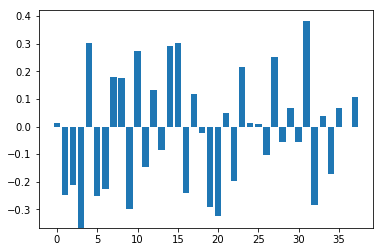

In [36]:
n_ic=np.zeros(len(rate_mean))
n_ic500=np.zeros(len(rate_mean))
for i in range(len(rate_mean)):
    n_icrate=cdrate[n_dic[i][0]].loc[fre0[i+ula]].values ###
    n_datarank=np.arange(len(n_icrate)+1)[1:]
    n_icrate500=cdrate[n_dic[i][0]].loc[fre0[i+ula]].values-cdrate500.loc[fre0[i+6]].values ###
    n_ic[i]=np.corrcoef(n_datarank,n_icrate500)[1][0]
num2=np.arange(len(n_ic))
plt.bar(num2,n_ic) #排序ic
plt.show()

# 组合胜率

In [37]:
n_vm=np.zeros(len(rate_mean))
for i in range(len(rate_mean)):
    n_vrate1=copy.deepcopy(errate[n_dic[i][0]].loc[fre0[i+ula]].T.mean()) ###
    if i==0:
        n_vrate=copy.deepcopy(n_vrate1)
    else:
        n_vrate=n_vrate.append(n_vrate1)
n_vrate500=n_vrate.values-errate500.loc[fre0[ula]:].values.T[0]
n_victory500=len(n_vrate500[n_vrate500>0])/len(n_vrate500) #每日超额胜率
n_vclc=n_dicrate[0]-cdrate500.values.T[0][ula-1:]
n_victoryclc500=len(n_vclc[n_vclc>0])/len(n_vclc) #周期超额胜率

# 资金走势图

In [29]:
money=input()
feilvb=input()
feilvs=input()

1000000
0.001
0.001


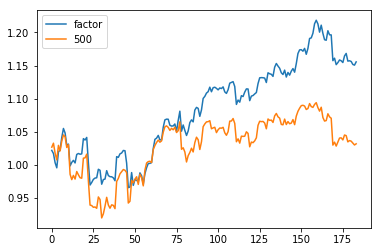

In [38]:
money=float(money)
feilvb=float(feilvb)
feilvs=float(feilvs)
for i in range(len(rate_mean)):
    price=errate1[n_dic[i][0]].loc[fre0[i+ula-1]]##
    price=price[len(price)-1:len(price)]
    gromoney=np.floor(int(money)/len(n_dic[i][0]))
    grostock=np.floor(gromoney/(price*100))*(price*100)
    sparem=(money-round(grostock.T.sum().values[0]*float(feilvb),2))-grostock.T.sum().values[0]
    uy=errate.loc[fre0[i+ula]]+1
    uy=uy[n_dic[i][0]].cumprod().append(grostock)
    uy[0:len(uy)-1]=uy[0:len(uy)-1]*uy.max()
    ret=copy.deepcopy((uy.T.sum()+sparem)[0:len(uy)-1]/money)
    ret[len(ret)-1:len(ret)]=(ret[len(ret)-1:len(ret)]*money-(ret[len(ret)-1:len(ret)]*money-sparem)*feilvs)/money
    uy500=(errate500.loc[fre0[i+ula]]+1).cumprod()
    #uy500[0:1]=uy500[0:1]-feilvb
    #uy500[len(uy500)-1:len(uy500)]=uy500[len(uy500)-1:len(uy500)]-feilvs
    u500=copy.deepcopy(uy500)
    u=copy.deepcopy(ret)
    if i==0:
        unitnet=copy.deepcopy(u)
        unitnet500=copy.deepcopy(u500)
    else:
        u=u-1+unitnet[len(unitnet)-1:len(unitnet)].values[0]
        u500=u500-1+unitnet500[len(unitnet500)-1:len(unitnet500)].values[0]
        unitnet=unitnet.append(u)
        unitnet500=unitnet500.append(u500)
#unitnet.index=data.index[-len(unitnet.index):]
#unitnet500.index=data.index[-len(unitnet500.index):]
plt.plot(unitnet.values,label='factor')
plt.plot(unitnet500.values,label='500')
plt.legend(loc=0, numpoints=1)
plt.show()

In [31]:
fpj=unitnet.values

In [39]:
pj=unitnet.values

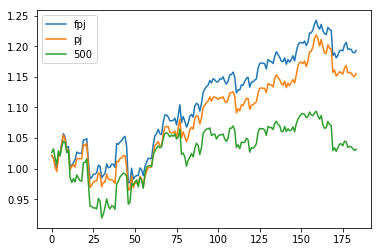

In [40]:
plt.plot(fpj,label='fpj')
plt.plot(pj,label='pj')
plt.plot(unitnet500.values,label='500')
plt.legend(loc=0, numpoints=1)
plt.show()